In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import math

from sklearn.metrics import accuracy_score

print(os.getcwd())
f_read=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv",sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data_set=f_read.loc[:,['Created Date', 'Closed Date', 'Agency', 'Complaint Type','Location Type','City',
                 'Facility Type','Status', 'Due Date','Resolution Action Updated Date','Borough','Park Borough']]
#print(data_set)

data_set.columns=['Created_Date', 'Closed_Date', 'Agency', 'Complaint_Type','Location_Type','City',
                 'Facility_Type','Status', 'Due_Date','Resolution_Action_Upd_Date','Borough','Park_Borough']
#print(data_set)
#print(data_set.isnull().sum())



D:\DWDM


In [39]:
city_complaint_type=data_set.groupby(['City','Complaint_Type'])
print(city_complaint_type.size())

City      Complaint_Type         
ARVERNE   Animal Abuse                3
          Derelict Vehicle            1
          Illegal Parking             6
          Noise - Commercial          1
          Noise - Street/Sidewalk     2
                                     ..
WOODSIDE  Noise - Street/Sidewalk    18
          Noise - Vehicle            12
          Traffic                     1
          Vending                     2
Woodside  Illegal Parking             1
Length: 445, dtype: int64


In [40]:
print(data_set['Complaint_Type'].unique())

['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Ferry Complaint' nan]


In [41]:
complaint_type = data_set.groupby('Complaint_Type')

In [42]:
complaint_analysis=complaint_type.size()

In [43]:
print(complaint_type.size())

Complaint_Type
Animal Abuse                  616
Bike/Roller/Skate Chronic      35
Blocked Driveway             5755
Derelict Vehicle             1335
Disorderly Youth               19
Drinking                      111
Ferry Complaint                 1
Graffiti                        5
Homeless Encampment           357
Illegal Fireworks               5
Illegal Parking              5552
Noise - Commercial           2024
Noise - House of Worship       85
Noise - Park                  351
Noise - Street/Sidewalk      4083
Noise - Vehicle              1279
Panhandling                    26
Posting Advertisement          48
Traffic                       218
Urinating in Public            44
Vending                       349
dtype: int64


In [44]:
df=complaint_analysis.to_frame().reset_index()

In [45]:
df.columns=['Complaint_Type','FREQ']
df

,Complaint_Type,FREQ
0,Animal Abuse,616
1,Bike/Roller/Skate Chronic,35
2,Blocked Driveway,5755
3,Derelict Vehicle,1335
4,Disorderly Youth,19
5,Drinking,111
6,Ferry Complaint,1
7,Graffiti,5
8,Homeless Encampment,357
9,Illegal Fireworks,5


In [46]:
sort_1=df.sort_values('FREQ',ascending=False)

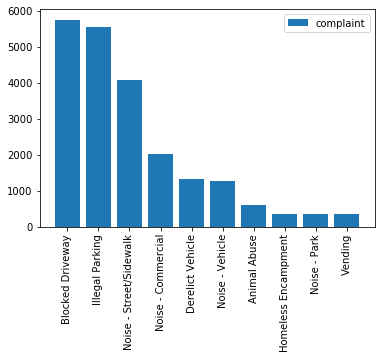

In [47]:
top10=sort_1.head(10)
x=range(10)
plt.bar(top10.Complaint_Type, top10.FREQ)
plt.xticks(x, top10.Complaint_Type, rotation='vertical')
plt.legend(['complaint'])
plt.show()


In [48]:
print(data_set.isnull().sum())

Created_Date                  164824
Closed_Date                   165084
Agency                        164824
Complaint_Type                164824
Location_Type                 164824
City                          165107
Facility_Type                 165084
Status                        164824
Due_Date                      164825
Resolution_Action_Upd_Date    165081
Borough                       164824
Park_Borough                  164824
dtype: int64


In [49]:
print(data_set.dtypes)

Created_Date                  object
Closed_Date                   object
Agency                        object
Complaint_Type                object
Location_Type                 object
City                          object
Facility_Type                 object
Status                        object
Due_Date                      object
Resolution_Action_Upd_Date    object
Borough                       object
Park_Borough                  object
dtype: object


In [50]:
data_set['City']=data_set['City'].fillna('Unknown')

In [51]:
data_set['City']

0         NEW YORK
1          ASTORIA
2            BRONX
3            BRONX
4         ELMHURST
            ...   
187117     Unknown
187118     Unknown
187119     Unknown
187120     Unknown
187121     Unknown
Name: City, Length: 187122, dtype: object

In [52]:
a=data_set['Facility_Type'].mode()[0]

In [53]:
a

'Precinct'

In [54]:
data_set['Facility_Type']=data_set['Facility_Type'].fillna(a)

In [55]:
data_set['Facility_Type']

0         Precinct
1         Precinct
2         Precinct
3         Precinct
4         Precinct
            ...   
187117    Precinct
187118    Precinct
187119    Precinct
187120    Precinct
187121    Precinct
Name: Facility_Type, Length: 187122, dtype: object

In [56]:
data_set['Location_Type']

0         Street/Sidewalk
1         Street/Sidewalk
2         Street/Sidewalk
3         Street/Sidewalk
4         Street/Sidewalk
               ...       
187117                NaN
187118                NaN
187119                NaN
187120                NaN
187121                NaN
Name: Location_Type, Length: 187122, dtype: object

In [57]:
b=data_set['Location_Type'].mode()[0]
print(b)

Street/Sidewalk


In [58]:
data_set['Location_Type']=data_set['Location_Type'].fillna(b)

In [59]:
data_set['Location_Type']

0         Street/Sidewalk
1         Street/Sidewalk
2         Street/Sidewalk
3         Street/Sidewalk
4         Street/Sidewalk
               ...       
187117    Street/Sidewalk
187118    Street/Sidewalk
187119    Street/Sidewalk
187120    Street/Sidewalk
187121    Street/Sidewalk
Name: Location_Type, Length: 187122, dtype: object

In [60]:
lbe=LabelEncoder()

In [61]:
data_set['Agency']=data_set['Agency'].fillna('Unknown')

In [62]:
data_set['Agency']=lbe.fit_transform(data_set['Agency'])

In [63]:
ct=data_set['Complaint_Type'].mode()[0]

In [33]:
ct

'Blocked Driveway'

In [64]:
data_set['Complaint_Type']=data_set['Complaint_Type'].fillna(ct)

In [65]:
data_set['Complaint_Type']

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
187117           Blocked Driveway
187118           Blocked Driveway
187119           Blocked Driveway
187120           Blocked Driveway
187121           Blocked Driveway
Name: Complaint_Type, Length: 187122, dtype: object

In [66]:
data_set['Complaint_Type']=lbe.fit_transform(data_set['Complaint_Type'])

In [67]:
data_set['Complaint_Type']

0         14
1          2
2          2
3         10
4         10
          ..
187117     2
187118     2
187119     2
187120     2
187121     2
Name: Complaint_Type, Length: 187122, dtype: int32

In [68]:
data_set['Location_Type']=lbe.fit_transform(data_set['Location_Type'])

In [69]:
data_set['Location_Type']

0         11
1         11
2         11
3         11
4         11
          ..
187117    11
187118    11
187119    11
187120    11
187121    11
Name: Location_Type, Length: 187122, dtype: int32

In [70]:
data_set['City']=lbe.fit_transform(data_set['City'])

In [71]:
data_set['City']

0         31
1          1
2          6
3          6
4         13
          ..
187117    46
187118    46
187119    46
187120    46
187121    46
Name: City, Length: 187122, dtype: int32

In [72]:
data_set['Facility_Type']=lbe.fit_transform(data_set['Facility_Type'])

In [74]:
br=data_set['Borough'].mode()[0]

In [75]:
br

'BROOKLYN'

In [76]:
data_set['Borough']=data_set['Borough'].fillna(br)

In [77]:
data_set['Borough']=lbe.fit_transform(data_set['Borough'])

In [78]:
pbr=data_set['Park_Borough'].mode()[0]

In [79]:
pbr

'BROOKLYN'

In [81]:
data_set['Park_Borough']=data_set['Park_Borough'].fillna(pbr)

In [83]:
sts=data_set['Status'].mode()[0]

In [84]:
sts


'Closed'

In [85]:
data_set['Status']=data_set['Status'].fillna(sts)

In [86]:
data_set['Park_Borough']=lbe.fit_transform(data_set['Park_Borough'])
data_set['Status']=lbe.fit_transform(data_set['Status'])


In [87]:
print(data_set.describe())

              Agency  Complaint_Type  Location_Type           City  \
count  187122.000000   187122.000000  187122.000000  187122.000000   
mean        0.880837        2.786722      10.913196      42.754369   
std         0.323981        2.806810       0.852035      10.072933   
min         0.000000        0.000000       0.000000       0.000000   
25%         1.000000        2.000000      11.000000      46.000000   
50%         1.000000        2.000000      11.000000      46.000000   
75%         1.000000        2.000000      11.000000      46.000000   
max         1.000000       20.000000      14.000000      50.000000   

       Facility_Type         Status        Borough   Park_Borough  
count       187122.0  187122.000000  187122.000000  187122.000000  
mean             0.0       0.999893       1.092164       1.092164  
std              0.0       0.037276       0.484333       0.484333  
min              0.0       0.000000       0.000000       0.000000  
25%              0.0       1.

In [88]:
print(data_set.dtypes)

Created_Date                  object
Closed_Date                   object
Agency                         int32
Complaint_Type                 int32
Location_Type                  int32
City                           int32
Facility_Type                  int32
Status                         int32
Due_Date                      object
Resolution_Action_Upd_Date    object
Borough                        int32
Park_Borough                   int32
dtype: object


In [ ]:
data_set.drop(['Created_Date','Closed_Date','Due_Date','Resolution_Action_Upd_Date','Agency'],axis=1,inplace = True)

In [95]:
data_set

,Complaint_Type,Location_Type,City,Facility_Type,Status,Borough,Park_Borough
0,14,11,31,0,1,2,2
1,2,11,1,0,1,3,3
2,2,11,6,0,1,0,0
3,10,11,6,0,1,0,0
4,10,11,13,0,1,3,3
...,...,...,...,...,...,...,...
187117,2,11,46,0,1,1,1
187118,2,11,46,0,1,1,1
187119,2,11,46,0,1,1,1
187120,2,11,46,0,1,1,1


In [97]:
x=data_set.iloc[:,0:5]

In [98]:
x

,Complaint_Type,Location_Type,City,Facility_Type,Status
0,14,11,31,0,1
1,2,11,1,0,1
2,2,11,6,0,1
3,10,11,6,0,1
4,10,11,13,0,1
...,...,...,...,...,...
187117,2,11,46,0,1
187118,2,11,46,0,1
187119,2,11,46,0,1
187120,2,11,46,0,1


In [99]:
y=data_set.iloc[:,6]

In [100]:
y

0         2
1         3
2         0
3         0
4         3
         ..
187117    1
187118    1
187119    1
187120    1
187121    1
Name: Park_Borough, Length: 187122, dtype: int32

In [101]:
print(y.isnull().sum())

0


In [102]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [103]:
print(X_train.shape)

(130985, 5)


In [104]:
print(y_train.shape)

(130985,)


In [105]:
print(X_test.shape)

(56137, 5)


In [106]:
print(y_test.shape)

(56137,)


In [107]:
ss= StandardScaler()
XX_train=ss.fit_transform(X_train)
XX_test=ss.fit_transform(X_test)

In [108]:
print(len(y))

187122


In [110]:
print(math.sqrt(len(y_test)) )

236.93247983339052


In [111]:
category= KNeighborsClassifier(n_neighbors=20)
category.fit(XX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [113]:
y_predict=category.predict(XX_test)
print(y_predict)

[1 1 1 ... 1 1 1]


In [115]:
accuracy_score(y_test,y_predict)

0.9978979995368473